In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
fname = '03_ICML_Results/CGS_multiclass_results.csv'
df_cgs = pd.read_csv(fname)
df_cgs.head()

fname = '03_ICML_Results/SMS_multiclass_results.csv'
df_sms = pd.read_csv(fname)
df_sms.head()

df = df_sms


In [15]:

# Define which classes to drop
drop_class = [3, 5]

# Original list of F1 columns
all_f1_columns = [
    'Class 0 F1 Score', 'Class 1 F1 Score', 'Class 2 F1 Score',
    'Class 3 F1 Score', 'Class 4 F1 Score', 'Class 5 F1 Score',
    'Class 6 F1 Score'
]

# Filter out the columns you want to drop
f1_columns = [
    col for col in all_f1_columns
    if int(col.split()[1]) not in drop_class
]

# Melt the DataFrame
df_melted = df.melt(
    id_vars=['CNN Model', 'Input Type', 'Target Type', 'Day', 'Hour'],
    value_vars=f1_columns,
    var_name='Class',
    value_name='F1 Score'
)

# Extract class number
df_melted['Class'] = df_melted['Class'].str.extract(r'Class (\d+) F1 Score').astype(int)

df_melted

,CNN Model,Input Type,Target Type,Day,Hour,Class,F1 Score
0,cgnet,rois,multiclass,1,8am,0,0.760932
1,cgnet,rois,multiclass,1,9am,0,0.792271
2,cgnet,rois,multiclass,1,10am,0,0.791482
3,cgnet,rois,multiclass,1,11am,0,0.789158
4,cgnet,rois,multiclass,1,12pm,0,0.797359
...,...,...,...,...,...,...,...
43375,unet,full,multiclass,59,3pm,6,0.984576
43376,unet,full,multiclass,59,4pm,6,0.986289
43377,unet,full,multiclass,59,5pm,6,0.987821
43378,unet,full,multiclass,59,6pm,6,0.989005


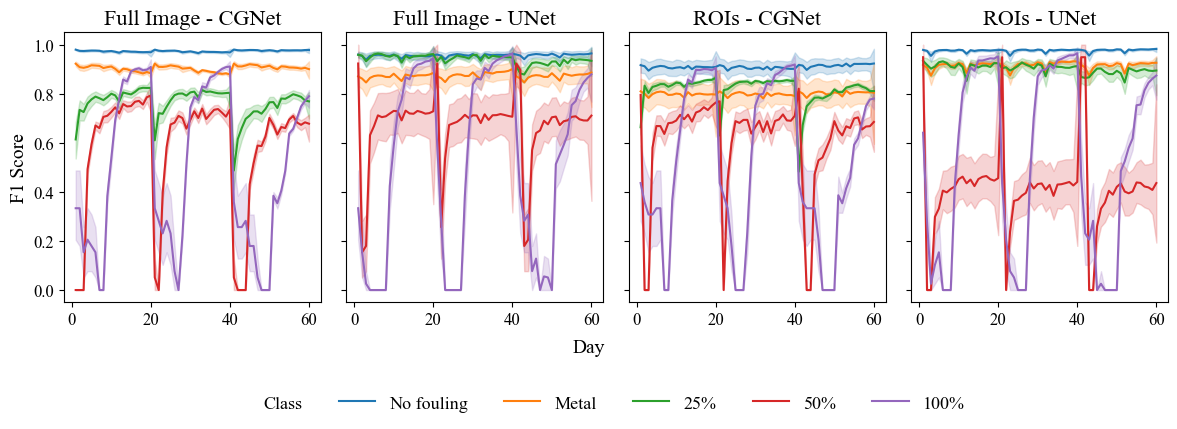

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font size and font family to Times New Roman
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 13,
    'font.family': 'serif',
    'font.serif': ['Times New Roman']
})

# Class mapping
class_map = {
    0: 'No fouling',
    1: 'Metal',
    2: '25%',
    4: '50%',
    6: '100%'
}

# Filter and relabel
df_filtered = df_melted[df_melted['Class'].isin(class_map.keys())].copy()
df_filtered['Class Label'] = df_filtered['Class'].map(class_map)

# Subplot combinations
combinations = [
    ('full', 'cgnet'),
    ('full', 'unet'),
    ('rois', 'cgnet'),
    ('rois', 'unet')
]

titles = [
    'Full Image - CGNet',
    'Full Image - UNet',
    'ROIs - CGNet',
    'ROIs - UNet'
]

# Create subplots
num_plots = len(combinations)
fig, axes = plt.subplots(1, num_plots, figsize=(12, 4), sharey=True, sharex=True)

for i, ((input_type, model), ax, title) in enumerate(zip(combinations, axes, titles)):
    mask = (df_filtered['CNN Model'] == model) & (df_filtered['Input Type'] == input_type)
    to_plot = df_filtered.loc[mask]

    sns.lineplot(x="Day", y="F1 Score", hue="Class Label", ax=ax, data=to_plot)
    ax.set_title(title)
    # Remove individual x-axis labels
    ax.set_xlabel("")
    if i == 0:
        ax.set_ylabel("F1 Score")
    else:
        ax.set_ylabel("")
    ax.legend_.remove()  # Remove subplot legends

# Set shared x-axis label, but move it further upwards by increasing y
fig.supxlabel("Day", fontsize=14, y=0.08)  # Default is y=0.01, so 0.08 moves it up

# Create dummy handle for "Class" label
from matplotlib.lines import Line2D
class_label_handle = Line2D([], [], color='none', label='Class')

# Get existing handles and labels
handles, labels = axes[0].get_legend_handles_labels()

# Insert the dummy handle at the beginning
handles.insert(0, class_label_handle)
labels.insert(0, "Class")

# Add shared horizontal legend below
fig.legend(handles, labels, loc='lower center', ncol=len(labels), frameon=False, bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
plt.show()


In [17]:
fig.savefig('multiclass_f1_score.png', dpi=300, bbox_inches='tight')